# What is the accretion disk and how does it reverberate?

If we knew, I'd be out of a job

## General disk params and how they effect reverberation in the lamppost paradigm

In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.append("../../Amoeba/")
from amoeba.Classes.accretion_disk import AccretionDisk
from amoeba.Classes.magnification_map import MagnificationMap
from amoeba.Classes.blr import BroadLineRegion
from amoeba.Classes.blr_streamline import Streamline
from amoeba.Util.util import (
    calculate_gravitational_radius,
    accretion_disk_temperature,
    generate_signal_from_psd,
    generate_snapshots_of_radiation_pattern,
    convolve_signal_with_transfer_function,
    create_maps,
)
import numpy as np
from astropy.io import fits

plt.style.use("/Users/henrybest/PythonStuff/Code/plot_style.txt")
import glob
import astropy.constants as const
import astropy.units as u
import time
from scipy.interpolate import interp1d

t_start = time.time()

### Important! Mass. Eddington ratio. Inclination. Radial bounds. Redshift (cosmology). 

#### Less important. Wind parameters, lamppost strength, albedo. Ray tracing (more important the closer you probe to the SMBH)

In [2]:
mass_exponent = 9.0  # solution to log_10 (M_bh / M_sun)
redshift = 0.3
number_grav_radii = 1000  # Rg
resolution = 1000  # pixels
inclination = 55  # deg
eddington_ratio = 0.2
##############
temp_beta = 0.0
corona_height = 10  # Rg
albedo = 0.0
eta = 0.0
bh_spin = 0.0
temp_profile = "SS"

In [3]:
agn_kwarg_dict = create_maps(
    mass_exponent,
    redshift,
    number_grav_radii,
    inclination,
    resolution,
    spin=bh_spin,
    eddington_ratio=eddington_ratio,
    temp_beta=temp_beta,
    corona_height=corona_height,
    albedo=albedo,
    eta=eta,
    visc_temp_prof=temp_profile,
)

What does this "create maps" do anyway?

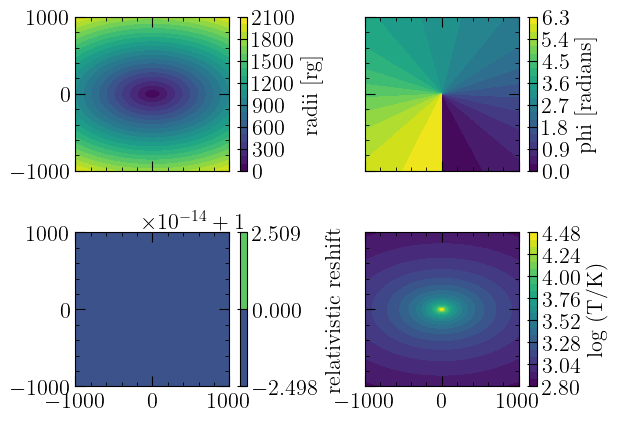

In [4]:
xax = np.linspace(
    -number_grav_radii, number_grav_radii, np.size(agn_kwarg_dict["radii_array"], 0)
)
X, Y = np.meshgrid(xax, xax)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
cont_r = ax[0, 0].contourf(X, Y, agn_kwarg_dict["radii_array"], 20)
cont_phi = ax[0, 1].contourf(
    X, Y, (agn_kwarg_dict["phi_array"] + 4 * np.pi) % (2 * np.pi), 20
)
cont_g = ax[1, 0].contourf(X, Y, agn_kwarg_dict["g_array"])
cont_temp = ax[1, 1].contourf(X, Y, np.log10(agn_kwarg_dict["temp_array"]), 20)

cbar_r = plt.colorbar(cont_r, ax=ax[0, 0], label="radii [rg]")
cbar_phi = plt.colorbar(cont_phi, ax=ax[0, 1], label="phi [radians]")
cbar_g = plt.colorbar(cont_g, ax=ax[1, 0], label="relativistic reshift")
cbar_temp = plt.colorbar(cont_temp, ax=ax[1, 1], label="log (T/K)")

for jj in range(4):
    ax[jj // 2, jj % 2].set_aspect(1)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [5]:
print(agn_kwarg_dict)

{'smbh_mass_exp': 9.0, 'redshift_source': 0.3, 'inclination_angle': 55, 'corona_height': 10, 'temp_array': array([[729.124486  , 729.39280055, 729.66094058, ..., 729.66094058,
        729.39280055, 729.124486  ],
       [729.94118683, 730.2106113 , 730.47986164, ..., 730.47986164,
        730.2106113 , 729.94118683],
       [730.75962264, 731.03016276, 731.30052912, ..., 731.30052912,
        731.03016276, 730.75962264],
       ...,
       [730.75962264, 731.03016276, 731.30052912, ..., 731.30052912,
        731.03016276, 730.75962264],
       [729.94118683, 730.2106113 , 730.47986164, ..., 730.47986164,
        730.2106113 , 729.94118683],
       [729.124486  , 729.39280055, 729.66094058, ..., 729.66094058,
        729.39280055, 729.124486  ]]), 'phi_array': array([[5.76242153, 5.763286  , 5.76415133, ..., 0.51903398, 0.51989931,
        0.52076378],
       [5.76155619, 5.76242153, 5.76328774, ..., 0.51989757, 0.52076378,
        0.52162912],
       [5.76068823, 5.76155445, 5.76242153

### yuck. don't look at it. But, you can either start playing around with this dictionary or the params that go into create_maps to simulate almost any AGN disk.

All you need to do is the following to do science.

In [6]:
Disk = AccretionDisk(**agn_kwarg_dict)

In [7]:
? Disk

Type:           AccretionDisk
String form:    <amoeba.Classes.accretion_disk.AccretionDisk object at 0x10c38dbe0>
File:           ~/PythonStuff/Code/Amoeba/amoeba/Classes/accretion_disk.py
Docstring:      <no docstring>
Init docstring:
Object representing an accretion disk which is optically thick and
geometrically flat.

:param smbh_mass_exp: mass exponent of the sumpermassive black hole at the
    center of the disk expressed as log_10(M / M_sun). Typical ranges are 6-11
    for AGN.
:param redshift: positive float repreaenting the redshift of the AGN.
:param inclination_angle: inclination of the accretion disk with respect to the
    observer, in degrees
:param corona_height: height of the corona in the lamppost model in units of R_g
    = GM/c^2
:param temp_array: a 2d representation of the effective temperature distribution
    of the accretion disk
:param phi_array: a 2d representation of the azimuth angles on the accretion
    disk
:param g_array: a 2d representation of the g-fa

In [8]:
dir(Disk)

['H0',
 'Om0',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'albedo_array',
 'calculate_db_dt_array',
 'calculate_dt_dlx_array',
 'calculate_surface_intensity_map',
 'calculate_time_lag_array',
 'construct_accretion_disk_transfer_function',
 'corona_height',
 'g_array',
 'generate_snapshots',
 'height_array',
 'inclination_angle',
 'little_h',
 'lum_dist',
 'mass',
 'name',
 'phi_array',
 'pixel_size',
 'r_out_in_gravitational_radii',
 'radii_array',
 'redshift_source',
 'rg',
 'smbh_mass_exp',
 'spin',
 'temp_array']

## Look at all that stuff. Lets make a surface intensity map and a transfer function

In [9]:
my_wavelength_in_nm = 600

intensity = Disk.calculate_surface_intensity_map(my_wavelength_in_nm)
transfer_function = Disk.construct_accretion_disk_transfer_function(my_wavelength_in_nm)
time_delay_contours = Disk.calculate_time_lag_array()

"intensity" is a FluxProjection object, which has more info about how it was constructed. Pull the flux array from it.

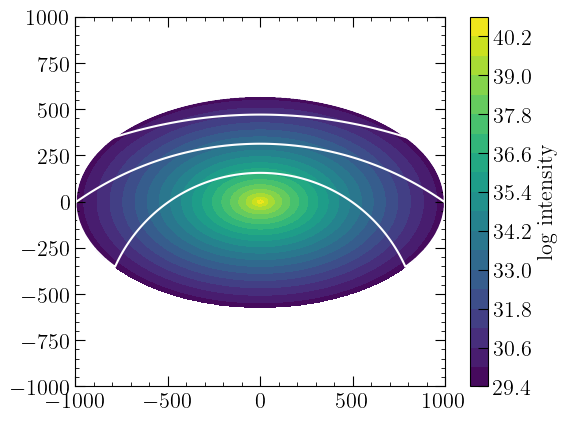

In [10]:
intensity_array = intensity.flux_array
contour_levels = [500, 1000, 1500, 2000]


fig, ax = plt.subplots()
conts = ax.contourf(X, Y, np.log10(intensity_array), 20)
cbar = plt.colorbar(conts, ax=ax, label="log intensity")
tconts = ax.contour(X, Y, time_delay_contours, contour_levels, colors="white")
ax.set_aspect(1)
plt.show()

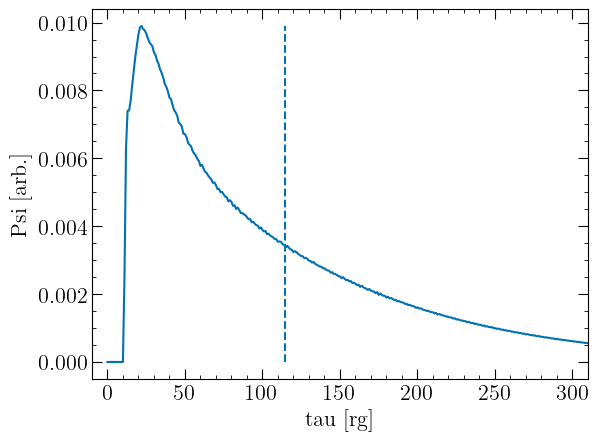

In [11]:
tau_ax = np.linspace(0, len(transfer_function) - 1, len(transfer_function))
mean_tau = np.sum(tau_ax * transfer_function)

fig, ax = plt.subplots()
ax.plot(transfer_function)
ax.set_prop_cycle(None)
ax.plot([mean_tau, mean_tau], [0, np.max(transfer_function)], "--")
ax.set_xlabel("tau [rg]")
ax.set_ylabel("Psi [arb.]")
ax.set_xlim(-10, 310)
plt.show()

In [12]:
agn_kwarg_dict = create_maps(
    mass_exponent,
    redshift,
    number_grav_radii,
    inclination,
    resolution,
    spin=bh_spin,
    eddington_ratio=eddington_ratio,
    temp_beta=temp_beta,
    corona_height=corona_height,
    albedo=albedo,
    eta=eta,
    visc_temp_prof="NT",
)
Disk_NT = AccretionDisk(**agn_kwarg_dict)
intensity_NT = Disk_NT.calculate_surface_intensity_map(my_wavelength_in_nm)
transfer_function_NT = Disk_NT.construct_accretion_disk_transfer_function(
    my_wavelength_in_nm
)
intensity_array_NT = intensity_NT.flux_array

### Sometimes people plot these transfer functions on loglog or semi-log scales. 

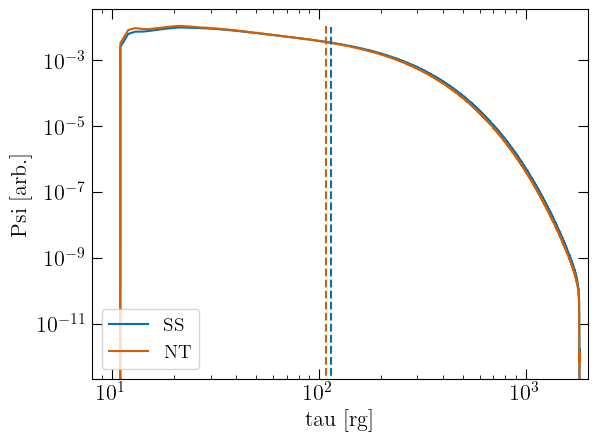

In [13]:
tau_ax_NT = np.linspace(0, len(transfer_function_NT) - 1, len(transfer_function_NT))
mean_tau_NT = np.sum(tau_ax_NT * transfer_function_NT)

fig, ax = plt.subplots()
ax.loglog(transfer_function, label="SS")
ax.loglog(transfer_function_NT, label="NT")
ax.set_prop_cycle(None)
ax.plot([mean_tau, mean_tau], [0, np.max(transfer_function)], "--")
ax.plot([mean_tau_NT, mean_tau_NT], [0, np.max(transfer_function_NT)], "--")

ax.set_xlabel("tau [rg]")
ax.set_ylabel("Psi [arb.]")
ax.set_xlim(8, 2000)
ax.legend(loc=3)
plt.show()

### So hopefully this shows how this can be used easily for accretion disks.

#### I also made a small library of GR ray tracings to not have to keep running time-consuming code

In [14]:
ray_trace_path = "/Users/henrybest/PythonStuff/Code/SchwarzschildRayTraces/"
fnames = glob.glob(ray_trace_path + "*")
fnames.sort()
inc_ang = 67
mass = 10**mass_exponent * const.M_sun.to(u.kg)
grav_rad = calculate_gravitational_radius(10**mass_exponent)

fname = fnames[int(inc_ang)]

with fits.open(fname) as f:
    r_map = f[0].data
    phi_map = f[1].data
    g_map = f[2].data

# create the temp map using this radii map
t_map = accretion_disk_temperature(
    r_map * grav_rad,
    6.0 * grav_rad,
    10**mass_exponent,
    0.1,
    beta=0.1,
    corona_height=corona_height,
    albedo=0,
    visc_temp_prof="NT",
)

# overwrite some arrays in the previous dictionary, or make a new dict from scratch
agn_kwarg_dict["radii_array"] = r_map
agn_kwarg_dict["phi_array"] = phi_map
agn_kwarg_dict["g_array"] = g_map
agn_kwarg_dict["temp_array"] = t_map

GR_disk = AccretionDisk(**agn_kwarg_dict)
GR_intensity = GR_disk.calculate_surface_intensity_map(my_wavelength_in_nm)
GR_intensity_array = GR_intensity.flux_array

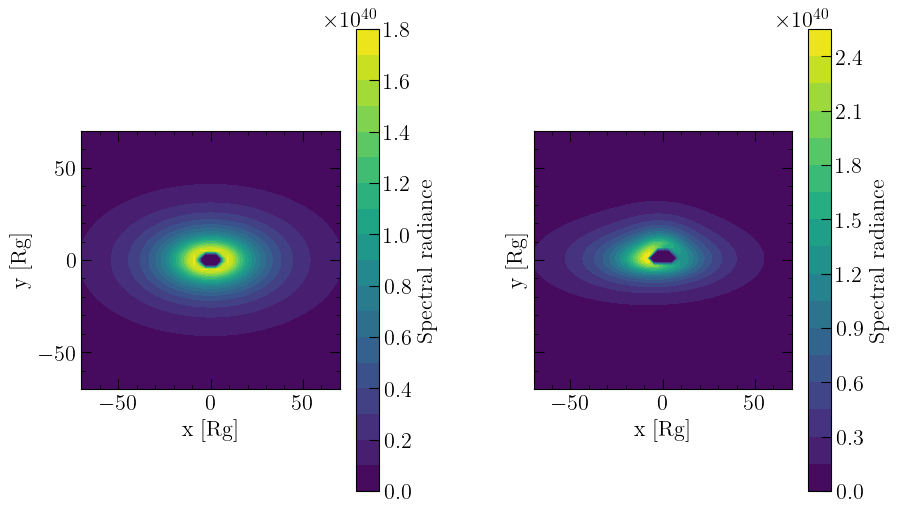

In [15]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 6))
conts = ax[0].contourf(X, Y, (intensity_array_NT), 20)
cbar = plt.colorbar(conts, ax=ax[0], label="Spectral radiance")
conts = ax[1].contourf(X, Y, (GR_intensity_array), 20)
cbar = plt.colorbar(conts, ax=ax[1], label="Spectral radiance")
for axis in ax:
    axis.set_aspect(1)
    axis.set_xlim(-70, 70)
    axis.set_ylim(-70, 70)
    axis.set_xlabel("x [Rg]")
    axis.set_ylabel("y [Rg]")
plt.subplots_adjust(wspace=0.4)
plt.show()

#### Amoeba is semi-analytic, so we can define anything as the temperature profile and calculate flux distributions with it. 

###### Even with GR.

In [16]:
my_radial_temp = np.zeros(3000)
my_radial_temp[50:150] = np.linspace(0, 99, 100) * np.linspace(99, 0, 100) * 10
my_temp_array = np.take(
    my_radial_temp, (r_map.astype(int))
)  # note that radii must be cast to integers
mask_1 = phi_map > -np.pi / 5
mask_2 = phi_map < np.pi / 5
mask_3 = phi_map > 3.2 * np.pi / 5
mask_4 = phi_map < 3.5 * np.pi / 5
mask_5 = phi_map < -4.7 * np.pi / 5
mask_6 = phi_map > -5 * np.pi / 5

full_mask = (
    np.logical_and(mask_1, mask_2)
    + np.logical_and(mask_3, mask_4)
    + np.logical_and(mask_5, mask_6)
)

my_temp_array *= full_mask

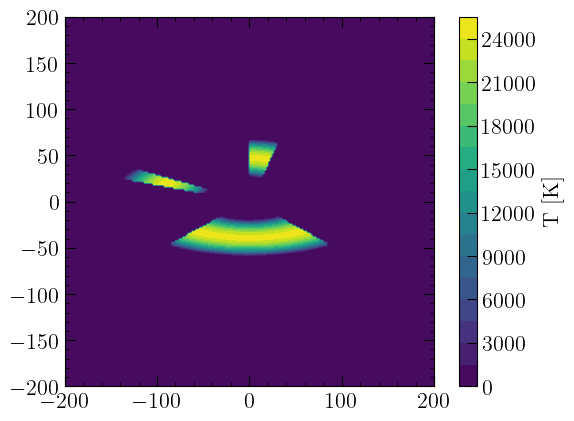

In [17]:
fig, ax = plt.subplots()
conts = ax.contourf(X, Y, my_temp_array, 20)
plt.colorbar(conts, ax=ax, label="T [K]")
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_aspect(1)
plt.show()

Make some "plots" from this.

In [18]:
agn_kwarg_dict["temp_array"] = my_temp_array
silly_disk = AccretionDisk(**agn_kwarg_dict)
silly_intensity = silly_disk.calculate_surface_intensity_map(my_wavelength_in_nm)
silly_intensity_array = silly_intensity.flux_array
silly_transfer_function = silly_disk.construct_accretion_disk_transfer_function(
    my_wavelength_in_nm
)

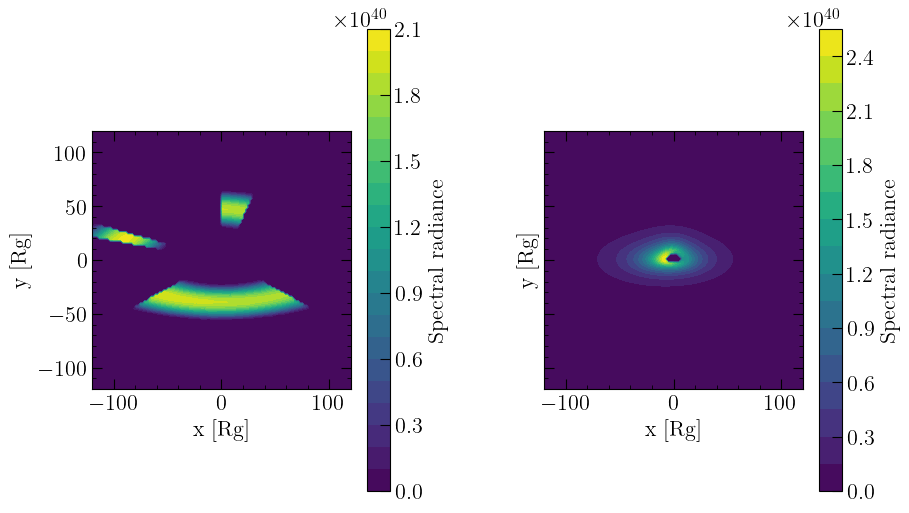

In [19]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 6))
conts = ax[0].contourf(X, Y, (silly_intensity_array), 20)
cbar = plt.colorbar(conts, ax=ax[0], label="Spectral radiance")
conts = ax[1].contourf(X, Y, (GR_intensity_array), 20)
cbar = plt.colorbar(conts, ax=ax[1], label="Spectral radiance")
for axis in ax:
    axis.set_aspect(1)
    axis.set_xlim(-120, 120)
    axis.set_ylim(-120, 120)
    axis.set_xlabel("x [Rg]")
    axis.set_ylabel("y [Rg]")
plt.subplots_adjust(wspace=0.4)
plt.show()

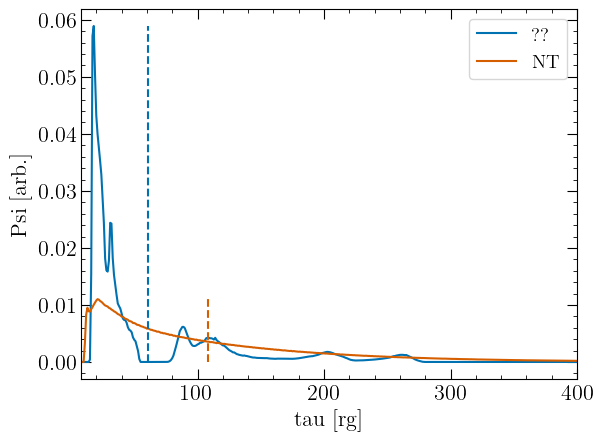

In [20]:
tau_ax_silly = np.linspace(
    0, len(silly_transfer_function) - 1, len(silly_transfer_function)
)
mean_tau_silly = np.sum(tau_ax_silly * silly_transfer_function)

fig, ax = plt.subplots()
ax.plot(silly_transfer_function, label="??")
ax.plot(transfer_function_NT, label="NT")
ax.set_prop_cycle(None)
ax.plot([mean_tau_silly, mean_tau_silly], [0, np.max(silly_transfer_function)], "--")
ax.plot([mean_tau_NT, mean_tau_NT], [0, np.max(transfer_function_NT)], "--")

ax.set_xlabel("tau [rg]")
ax.set_ylabel("Psi [arb.]")
ax.set_xlim(8, 400)
ax.legend(loc=1)
plt.show()

## Cool, now we're all AGN accretion disk experts

# Now let's generate a couple signals!

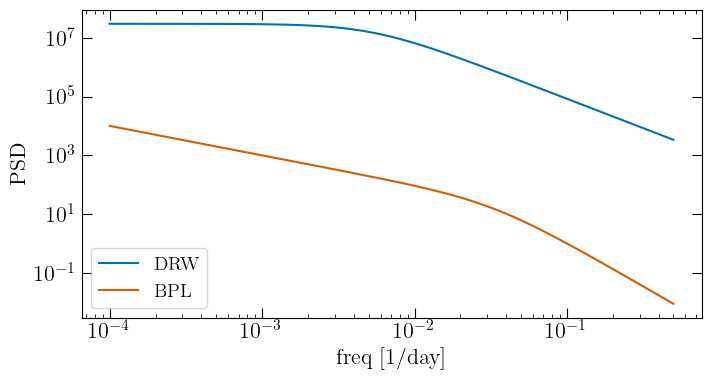

In [21]:
# common signal params
stochastic_signal_length = 10000
time_ax = np.linspace(0, stochastic_signal_length - 1, stochastic_signal_length)
freq_ax = np.linspace(
    1 / stochastic_signal_length, 1 / (2), int(stochastic_signal_length) + 1
)

# signal params (DRW)
sf_inf = 500
timescale = 30
psd_drw = (4 * timescale * sf_inf**2) / (1 + (2 * np.pi * timescale * freq_ax) ** 2)


# signal params (BPL)
low_slope = 1
high_slope = 3
breakpoint = 1 / 30  # inverse days
psd_bpl = freq_ax ** (-low_slope) * (
    1 + (freq_ax / breakpoint) ** (high_slope - low_slope)
) ** (-1)

fig, ax = plt.subplots(figsize=(8, 4))
ax.loglog(freq_ax, psd_drw, label="DRW")
ax.loglog(freq_ax, psd_bpl, label="BPL")
ax.legend(loc=3)
ax.set_xlabel("freq [1/day]")
ax.set_ylabel("PSD")
plt.show()

Make some random signals! Thanks Timmer+Koenig!

In [22]:
drw_signal = generate_signal_from_psd(stochastic_signal_length, psd_drw, freq_ax)
bpl_signal = generate_signal_from_psd(stochastic_signal_length, psd_bpl, freq_ax)

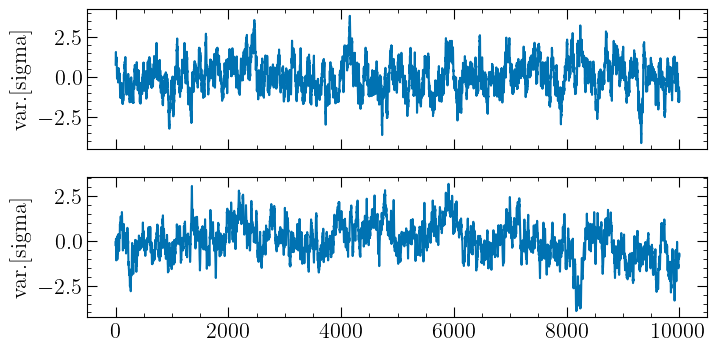

In [23]:
fig, ax = plt.subplots(2, sharex=True, figsize=(8, 4))
ax[0].plot(time_ax, drw_signal)
ax[1].plot(time_ax, bpl_signal)
for axis in ax:
    axis.set_ylabel("var.[sigma]")
plt.show()

This is also super fast

In [24]:
n_curves = 1000
t_now = time.time()
for jj in range(n_curves):
    generate_signal_from_psd(stochastic_signal_length, psd_bpl, freq_ax)
print("took", round(time.time() - t_now, 1), "seconds for", n_curves, "light curves")

took 0.9 seconds for 1000 light curves


## These signals can be used as the driving signal and converted to a disk response via the transfer functions. 

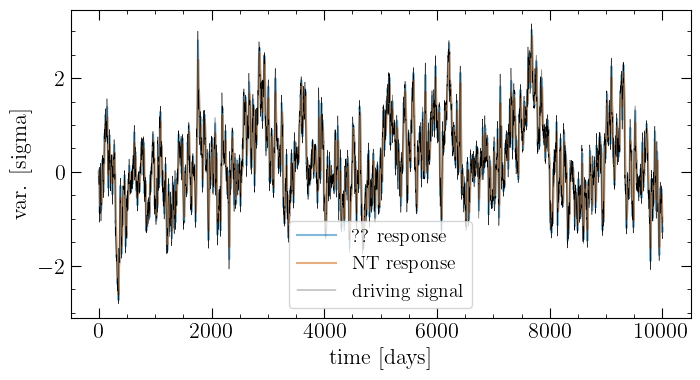

In [25]:
silly_disk_response = convolve_signal_with_transfer_function(
    mass_exponent=mass_exponent,
    driving_signal=bpl_signal,
    transfer_function=silly_transfer_function,
    redshift=redshift,
)
NT_disk_response = convolve_signal_with_transfer_function(
    mass_exponent=mass_exponent,
    driving_signal=bpl_signal,
    transfer_function=transfer_function_NT,
    redshift=redshift,
)

# note the driving signal was generated in the SOURCE PLANE. It needs to be redshifted.
time_ax_obs_frame = np.linspace(0, len(time_ax) / (1 + redshift), len(time_ax))
interp_driving_signal = interp1d(time_ax, bpl_signal, bounds_error=False)
bpl_signal_obs_frame = interp_driving_signal(time_ax_obs_frame)


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_ax, silly_disk_response[: len(time_ax)], alpha=0.5, label="?? response")
ax.plot(time_ax, NT_disk_response[: len(time_ax)], alpha=0.5, label="NT response")
ax.plot(
    time_ax, bpl_signal_obs_frame, linewidth=0.3, color="black", label="driving signal"
)
ax.set_xlabel("time [days]")
ax.set_ylabel("var. [sigma]")
ax.legend()
plt.show()

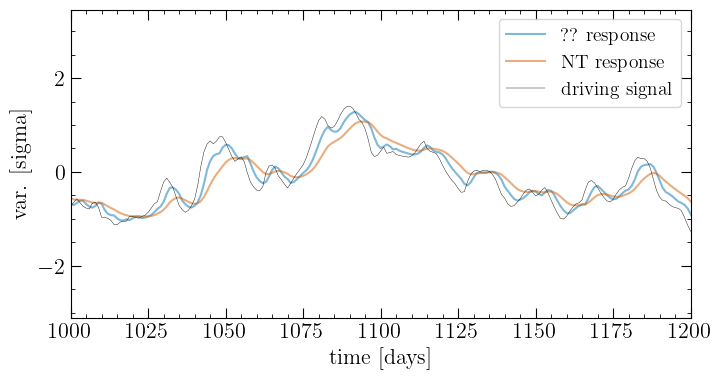

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_ax, silly_disk_response[: len(time_ax)], alpha=0.5, label="?? response")
ax.plot(time_ax, NT_disk_response[: len(time_ax)], alpha=0.5, label="NT response")
ax.plot(
    time_ax, bpl_signal_obs_frame, linewidth=0.3, color="black", label="driving signal"
)
ax.set_xlabel("time [days]")
ax.set_ylabel("var. [sigma]")
ax.legend()
ax.set_xlim(1000, 1200)
plt.show()

# Thanks for watching!

In [27]:
print("total time elapsed:", round(time.time() - t_start, 1), "seconds")

total time elapsed: 30.8 seconds
